# **Práctica Calificada 1 - Grupo 10**
### **Integrantes para esta entrega**
Eduardo Cavero

Diego Almenara

Karlo La Hoz Sanchez

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

c:\Users\Eduio\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# **Ejercicio 1. Fundamentos Teóricos y Conceptuales**

## 1.1. Pregunta 1: Sesgo-Varianza y la Regularizaci´on de Modelos
**Versión A (Alta Penalización / Baja Complejidad):** 
Se aplica una penalización muy fuerte. Esto obliga al modelo a ser muy simple, forzando a que la mayoría
de los coeficientes de las variables sean pequeños o exactamente cero. El modelo
resultante es muy restringido y se basa en unos pocos predictores clave.
**Versión B (Penalización Equilibrada / Complejidad Media):** 
Se aplica una penalización moderada, seleccionada a través de validación cruzada.
**Versión C (Baja Penalización / Alta Complejidad):**
La penalización es muy baja o nula. El modelo tiene libertad para usar todas las variables disponibles y
ajustarse a los datos de entrenamiento.

## a) Análisis del Sesgo:
**Ordene las tres versiones del modelo (de menor a mayor) según su sesgo esperado y justifiquesu orden.**
La penalización controla la flexibilidad del modelo. Una penalización alta restringe los coeficientes, brindándonos un modelo rígido con alto sesgo. Por el contrario, una penalización baja permite mayor flexibilidad, reduciendo el sesgo pero aumentando el riesgo de overfiting o sobreajuste. Considerando ello, el orden de los modelos según su sesgo esperado es el siguiente:

**1) Versión C (Baja Penalización / Alta Complejidad):**
Menor sesgo. Al tener poca penalización, el modelo puede ajustarse fuertemente a los datos de entrenamiento, capturando patrones complejos y reduciendo el error de aproximación.

**2) Versión B (Penalización Equilibrada / Complejidad Media):** 
Sesgo moderado. La penalización moderada permite un equilibrio, evitando tanto el sobreajuste como el subajuste, lo que resulta en un sesgo intermedio.

**3) Versión A (Alta Penalización / Baja Complejidad):**
Mayor sesgo. La fuerte penalización fuerza al modelo a ser muy simple, ignorando variables relevantes y generando un error de aproximación alto.

## b) Análisis de la Varianza:
**Ordene las tres versiones del modelo (de menor a mayor) según su varianza esperada y justifique su orden.**
La penalización actúa como un regularizador que reduce la varianza al limitar la magnitud de los coeficientes. Sin penalización, el modelo puede volverse demasiado complejo y vulnerable al overfitting, incrementando la varianza. Es debido a ello que el orden de los modelos según su varianza esperada es la siguiente:

**Versión A (Alta Penalización / Baja Complejidad):**
Menor varianza. La alta penalización estabiliza el modelo, haciendo que los coeficientes sean pequeños o cero, lo que reduce la sensibilidad a cambios en los datos.

**Versión B (Penalización Equilibrada / Complejidad Media):**
Varianza moderada. La penalización moderada controla la complejidad, resultando en una varianza intermedia.

**Versión C (Baja Penalización / Alta Complejidad):**
Mayor varianza. La baja penalización permite que el modelo se ajuste a ruidos en los datos de entrenamiento, volviendola sensible a variaciones muestrales.



## c) El Dilema del Investigador:
El argumento de que la Versión C es la mejor por tener el error más bajo en entrenamiento es erróneo ya que no considera el error de generalización. Un modelo con baja penalización, puede sobreajustarse a los datos de entrenamiento, mostrando problemas al encontrarse con datos nuevos. Esto se debe a que minimiza el error de entrenamiento pero no necesariamente el error de prueba.
Además, el verdadero objetivo del modelado no es replicar perfectamente los datos de entrenamiento, sino capturar la relación fundamental entre las variables para hacer predicciones precisas en situaciones nuevas. Para evitar el overfiting o, realizamos métodos de validación como:
Validación Cruzada (Cross-Validation): Divide los datos en múltiples subconjuntos para evaluar el rendimiento en datos no utilizados durante el entrenamiento.
Bootstrap: Genera múltiples muestras con reemplazo para estimar la variabilidad del modelo.
validación independiente: Divide la data en un grupo de entrenamiento (training data) y otro grupo exclusivamente para evaluar el modelo final (test data).

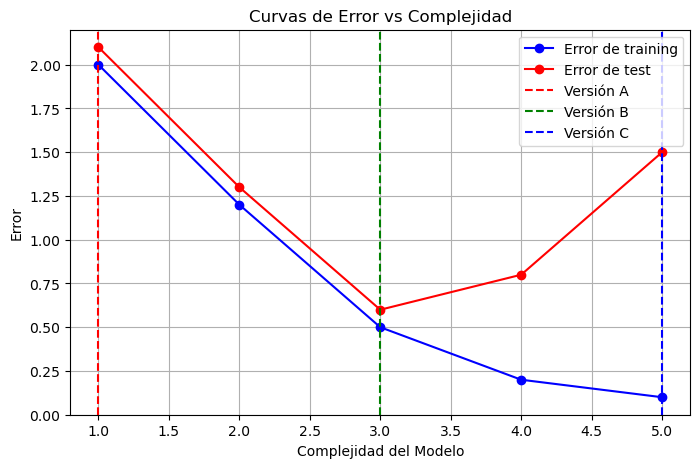

In [2]:
import matplotlib.pyplot as plt

# Datos simples para el gráfico
complejidad = [1, 2, 3, 4, 5]
error_entrenamiento = [2.0, 1.2, 0.5, 0.2, 0.1]
error_prueba = [2.1, 1.3, 0.6, 0.8, 1.5]

# Crear el gráfico
plt.figure(figsize=(8, 5))
plt.plot(complejidad, error_entrenamiento, 'bo-', label='Error de training')
plt.plot(complejidad, error_prueba, 'ro-', label='Error de test')

# Marcar las versiones
plt.axvline(x=1, color='red', linestyle='--', label='Versión A')
plt.axvline(x=3, color='green', linestyle='--', label='Versión B') 
plt.axvline(x=5, color='blue', linestyle='--', label='Versión C')

# Configuración
plt.xlabel('Complejidad del Modelo')
plt.ylabel('Error')
plt.title('Curvas de Error vs Complejidad')
plt.legend()
plt.grid(True)

plt.show()

## 1.2. Pregunta 2: Estrategias de Validación en Investigación Social
Una socióloga está desarrollando un modelo para predecir el nivel de “confianza en
las instituciones” (una escala de 0 a 100) en ciudadanos de un pa´ıs. Dispone de una
encuesta nacional de alta calidad pero con un número limitado de encuestados: N = 600
observaciones.
Está considerando dos métodos de validación cruzada para estimar el error de su
modelo:
**Método A:**
Validación Cruzada de 5 pliegues (5-fold CV).
**Método B:**
Validación Cruzada Dejando Uno Fuera (LOOCV).

## a) Análisis de la Calidad de la Estimación del Error:
**¿Qué método (A o B) produce una estimación menos sesgada y por qué?**

El método (LOOCV) es el que produce una estimación menos sesgada del error de generalización. Esto porque, a medida que el tamaño del conjunto de entrenamiento se acerca al tamaño total de la muestra, el sesgo en la estimación del error disminuye. LOOCV maximiza el tamaño del conjunto de entrenamiento en cada iteración.

**Justificación:**

LOOCV utiliza N-1 = 599 observaciones para entrenamiento y 1 observación para validación en cada iteración,
esto significa que cada modelo se entrena con prácticamente la totalidad de los datos disponibles (599 de 600) y como resultado, el modelo de cada iteración es muy similar al modelo que se obtendría con todos los datos.
En comparación, 5-fold CV usa 480 observaciones para entrenamiento (80%) y 120 para validación (20%) en cada pliegue, por lo que cada modelo se entrena con menos datos que el conjunto completo.

## b) Recomendación Metodológica:
**¿Qué método le recomendaréa a la socióloga parasu publicación? Justifique su elección, argumentando por qué es la opción más equilibrada y defendible.

Para esta investigación con N=600, el 5-fold CV representa un método óptimo con suficientes datos para entrenamiento en cada pliegue (480 observaciones), validación robusta (120 observaciones por pliegue), costo computacional razonable, y es metodológicamente defendible en publicaciones académicas.

**Justificación:**

Cuenta con una compensación óptima entre sesgo y varianza. Si bien LOOCV tiene menor sesgo, tiene mayor varianza en la estimación del error, esto ocurre porque cada estimación se basa en un solo punto de validación, haciendo la métrica muy sensible a ruidos en la data, mientras que, M5-fold CV ofrece un mejor equilibrio de un sesgo aceptable con varianza reducida.

Por otro lado, LOOCV requiere ajustar 600 modelos (N = 600), en con paración con 5-fold CV, que requiere ajustar solo 5 modelos, teniendo (LOOCV) un mayor costo computacional. Para una investigadora con recursos limitados, la eficiencia computacional es práctica. 

Por último, con N = 600, 5-fold CV proporciona conjuntos de validación de 120 observaciones cada uno, esto da estimaciones más estables que la validación con un solo punto.

# **Ejercicio 2. Descenso de Gradiente**

# **Ejercicio 3. Regresión Lasso y Regularización**

In [3]:
url = 'https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/boston.csv'
df = pd.read_csv(url)

In [4]:
print(f"\nDimensiones del dataset: {df.shape}")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")


Dimensiones del dataset: (506, 14)
Filas: 506, Columnas: 14


In [18]:
# b) Exploración de la base de datos
#Primeras 5 filas
print(df.head())

#Información del DataFrame
print(df.info())

#Descriptivos
print(df.describe())

#Valores nulos
print(df.isnull().sum())

#Valores duplicados
print(f"Número de filas duplicadas: {df.duplicated().sum()}")

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat  medv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    fl

In [14]:
# c) Separar predictores (X) y objetivo (y)
if 'medv' in df_clean.columns:
    X = df_clean.drop('medv', axis=1)
    y = df_clean['medv']
    print(f"Variable objetivo (y): medv")
    print(f"Predictores (X): {list(X.columns)}")
    print(f"\nDimensiones:")
    print(f"  X (predictores): {X.shape}")
    print(f"  y (objetivo): {y.shape}")

Variable objetivo (y): medv
Predictores (X): ['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']

Dimensiones:
  X (predictores): (506, 13)
  y (objetivo): (506,)


In [17]:
# d) Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir de vuelta a DataFrame para mantener los nombres de columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print(f"\nEstadísticas de X_scaled:")
print(pd.DataFrame(X_scaled, columns=X.columns).describe().loc[['mean', 'std']])


Estadísticas de X_scaled:
        Unnamed: 0          crim            zn         indus          chas  \
mean -5.616939e-17 -1.123388e-16  7.898820e-17  2.106352e-16 -3.510587e-17   
std   1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00   

               nox            rm           age           dis           rad  \
mean -1.965929e-16 -1.088282e-16 -1.474446e-16 -8.425408e-17 -1.123388e-16   
std   1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00   

          tax       ptratio         lstat  
mean  0.00000 -4.212704e-16 -3.089316e-16  
std   1.00099  1.000990e+00  1.000990e+00  


In [19]:
# Parte 3.2: Implementación de Validación Cruzada con Lasso

from sklearn.linear_model import LassoCV
import numpy as np

In [21]:
# a) Configurar y entrenar LassoCV
lasso_cv = LassoCV(
    cv=10,              
    random_state=42,    
    max_iter=10000,     
    n_alphas=100        
)

lasso_cv.fit(X_scaled, y)

LassoCV(cv=10, max_iter=10000, random_state=42)

In [ ]:
# b) Imprimir el valor óptimo de alpha
print(f"Alpha óptimo: {lasso_cv.alpha_:.6f}")
print(f"\nInterpretación:")
print(f"  Este es el valor de penalización que minimiza el error")
print(f"  de validación cruzada (el mejor balance sesgo-varianza).")

Alpha óptimo: 0.089597

Interpretación:
  Este es el valor de penalización que minimiza el error
  de validación cruzada (el mejor balance sesgo-varianza).


In [23]:
# Parte 3.3: Interpretación del Gráfico Sesgo-Varianza

import matplotlib.pyplot as plt
import numpy as np


[1] Generando gráfico MSE promedio vs Alpha
------------------------------------------------------------


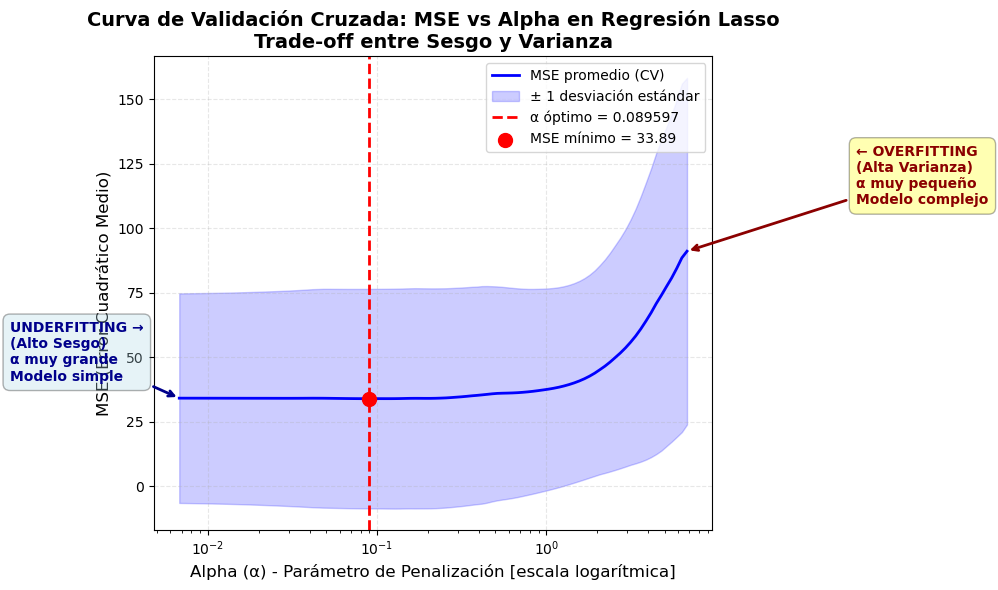

In [ ]:
# a) Generar el gráfico MSE vs Alpha

# Obtener los alphas probados y sus MSE correspondientes
alphas = lasso_cv.alphas_
mse_path = lasso_cv.mse_path_

# Calcular el MSE promedio para cada alpha (promedio sobre los folds)
mse_mean = mse_path.mean(axis=1)
mse_std = mse_path.std(axis=1)

# Crear la figura
plt.figure(figsize=(12, 6))

# Graficar MSE promedio vs Alpha
plt.semilogx(alphas, mse_mean, 'b-', linewidth=2, label='MSE promedio (CV)')

# Agregar banda de error (desviación estándar)
plt.fill_between(alphas, 
                  mse_mean - mse_std, 
                  mse_mean + mse_std, 
                  alpha=0.2, 
                  color='blue',
                  label='± 1 desviación estándar')

# Marcar el alpha óptimo
alpha_optimo = lasso_cv.alpha_
idx_optimo = np.argmin(mse_mean)
mse_optimo = mse_mean[idx_optimo]

plt.axvline(alpha_optimo, color='red', linestyle='--', linewidth=2, 
            label=f'α óptimo = {alpha_optimo:.6f}')
plt.scatter(alpha_optimo, mse_optimo, color='red', s=100, zorder=5,
            label=f'MSE mínimo = {mse_optimo:.2f}')

# Anotar regiones de overfitting y underfitting
plt.annotate('← OVERFITTING\n(Alta Varianza)\nα muy pequeño\nModelo complejo', 
             xy=(alphas[0], mse_mean[0]), 
             xytext=(alphas[0]*10, mse_mean[0]*1.2),
             fontsize=10, color='darkred', fontweight='bold',
             arrowprops=dict(arrowstyle='->', color='darkred', lw=2),
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3))

plt.annotate('UNDERFITTING →\n(Alto Sesgo)\nα muy grande\nModelo simple', 
             xy=(alphas[-1], mse_mean[-1]), 
             xytext=(alphas[-1]/10, mse_mean[-1]*1.2),
             fontsize=10, color='darkblue', fontweight='bold',
             arrowprops=dict(arrowstyle='->', color='darkblue', lw=2),
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.3))

# Gráfico final
plt.xlabel('Alpha (α) - Parámetro de Penalización [escala logarítmica]', fontsize=12)
plt.ylabel('MSE (Error Cuadrático Medio)', fontsize=12)
plt.title('Curva de Validación Cruzada: MSE vs Alpha en Regresión Lasso\n' + 
          'Trade-off entre Sesgo y Varianza', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

## b) Región de Overfitting (izquierda):
En la región izquierda del gráfico (α < 0.089), observamos que el MSE se mantiene relativamente estable y bajo (33-35). Sin embargo, cuando α se acerca a valores muy pequeños (α -> 0.01), la banda de error se ensancha significativamente, indicando alta varianza.
Esto ocurre porque con α muy pequeño, la penalización es casi nula, permitiendo que el modelo utilice todas las variables con coeficientes grandes. El modelo se vuelve extremadamente flexible y sensible a los datos de entrenamiento específicos, capturando incluso el ruido aleatorio. Diferentes particiones en la validación cruzada producen modelos muy diferentes, lo que explica la alta variabilidad del MSE.

## c) Región de Underfitting (derecha):
En la región derecha del gráfico (α > 0.089), observamos un aumento dramático del MSE, llegando a valores de 90-120 cuando α es muy grande (α > 1.0). Esto evidencia alto sesgo.
Con α muy grande, la penalización es tan fuerte que fuerza a la mayoría de coeficientes a ser cero o muy pequeños. El modelo resultante es extremadamente simple y rígido, incapaz de capturar las relaciones verdaderas entre los predictores y el precio de las viviendas. El modelo sistemáticamente comete errores grandes porque es demasiado simplista para el problema, resultando en alto MSE tanto en entrenamiento como en validación.